# **CNNaTaner**

In [ ]:
import tensorflow as tf
from keras import preprocessing
from keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
DATA_DIR = "/content/drive/MyDrive/GeezAlpha"
TRAINING_DIR = '/content/drive/MyDrive/GeezAlpha/Train'
VALIDATION_DIR = '/content/drive/MyDrive/GeezAlpha/Validation'
TEST_DIR = '/content/drive/MyDrive/GeezAlpha/Test'

BATCH_SIZE=100
EPOCS=50
PATIENCE=100
SHOW_MISTAKEN_PREDICTIONS=True


IMG_WIDTH=50
IMG_HEIGHT=50
'''
training_datagen = ImageDataGenerator( shear_range=0.0,
        zoom_range=0.05,
        rotation_range=40,
        horizontal_flip=True,
        rescale = 1./255)
'''
training_datagen =  ImageDataGenerator(rescale = 1./255)
validation_datagen =  ImageDataGenerator(rescale = 1./255)


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(IMG_WIDTH,IMG_HEIGHT),
    batch_size=BATCH_SIZE,
	class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(IMG_WIDTH,IMG_HEIGHT),
    batch_size=BATCH_SIZE,
	class_mode='categorical',
    shuffle=False)

number_of_classes=len(list(train_generator.class_indices.keys()))
modelaTaner = Sequential([
    # Note the input shape is the desired size of the image 50x50 with 3 byte color
    # This is the first convolution
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a CNN
    Flatten(),
    Dropout(0.5),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(number_of_classes, activation='softmax')
])

## optimizerı adam yap
## 1 level daha Conv2D + Maxpooling ekle

modelaTaner.summary()

Found 2150 images belonging to 6 classes.
Found 461 images belonging to 6 classes.
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 9, 9, 128)         73856     
                                    

In [ ]:
#model.compile(loss = 'categorical_crossentropy', optimizer=tf.optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
modelaTaner.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', mode='min',patience=PATIENCE),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss',mode='min', save_best_only=True,verbose=1)]


history = modelaTaner.fit_generator(train_generator,
                              epochs=EPOCS,
                              callbacks=callbacks,
                              validation_data = validation_generator,
                              steps_per_epoch=train_generator.samples // BATCH_SIZE,
                              validation_steps=validation_generator.samples // BATCH_SIZE,
                              verbose = 1)

#model.save("findik-cropped-V2-profil11liExt5.h5")

<ipython-input-32-f6ce2c0ff4b1>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = modelaTaner.fit_generator(train_generator,


Epoch 1/50
21/21 [==============================] - ETA: 0s - loss: 1.7530 - accuracy: 0.2776
Epoch 1: val_loss improved from inf to 1.50786, saving model to best_model.h5
21/21 [==============================] - 185s 9s/step - loss: 1.7530 - accuracy: 0.2776 - val_loss: 1.5079 - val_accuracy: 0.6575
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 1.1401 - accuracy: 0.6034
Epoch 2: val_loss improved from 1.50786 to 0.48622, saving model to best_model.h5
21/21 [==============================] - 16s 755ms/step - loss: 1.1401 - accuracy: 0.6034 - val_loss: 0.4862 - val_accuracy: 0.8500
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 0.5792 - accuracy: 0.7946
Epoch 3: val_loss improved from 0.48622 to 0.27710, saving model to best_model.h5
21/21 [==============================] - 15s 732ms/step - loss: 0.5792 - accuracy: 0.7946 - val_loss: 0.2771 - val_accuracy: 0.8925
Epoch 4/50
21/21 [==============================] - ETA: 0s - loss: 0.4072 - accur

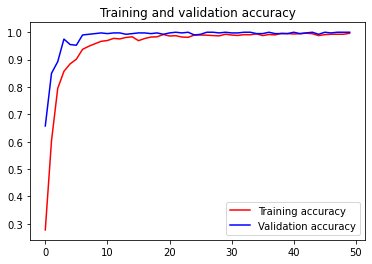

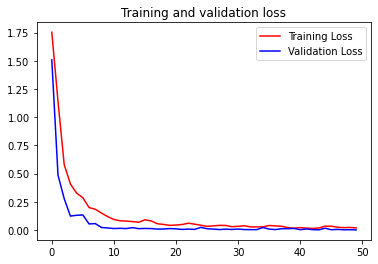

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        # Greys, Purples, Blues, Greens, Oranges, Reds, YlOrBr, YlOrRd, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGnBu, PuBuGn, BuGn, YlGn
        cmap = plt.get_cmap('YlGn')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
def results_for(model_file,
                data_generator,
                caption ):
    model = tf.keras.models.load_model(model_file)
    test_loss, test_acc = model.evaluate_generator(data_generator)
    print(caption,' acc:', test_acc)
    print(caption,' loss:', test_loss)
    # Confusion matrix
    num_of_samples=data_generator.samples
    batch_size=20
    Y_pred = model.predict_generator(data_generator, num_of_samples // batch_size)
    y_pred = np.argmax(Y_pred, axis=1)
    #print(y_pred)
    #print('Confusion Matrix')
    cm=confusion_matrix(data_generator.classes, y_pred)
    #print(cm)

    target_names=data_generator.class_indices.keys()
    plot_confusion_matrix(cm,normalize = False,target_names=target_names,title= "Confusion Matrix")
    print('Classification Report')
    print('---------------------')
    print(classification_report(data_generator.classes, y_pred, target_names=target_names, digits = 4))

    # list the mistaken predictions
    if SHOW_MISTAKEN_PREDICTIONS:
        print('\nMistaken predictions')
        print('--------------------')
        filenames=data_generator.filenames
        errors=np.where(y_pred!=data_generator.classes)[0]
        error_count=len(errors)
        for error in errors:
            predicted=list(data_generator.class_indices.keys())[list(data_generator.class_indices.values()).index(y_pred[error])]
            print("Picture:",filenames[error]," Misprediction ==>", predicted)

Found 459 images belonging to 6 classes.


<ipython-input-35-58d715248bcc>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(data_generator)


Test  acc: 0.9869281053543091
Test  loss: 0.0673774778842926


<ipython-input-35-58d715248bcc>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(data_generator, num_of_samples // batch_size)
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4616 (\N{ETHIOPIC SYLLABLE LA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4632 (\N{ETHIOPIC SYLLABLE MA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4704 (\N{ETHIOPIC SYLLABLE BA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4720 (\N{ETHIOPIC SYLLABLE TA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4752 (\N{ETHIOPIC SYLLABLE NA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4808

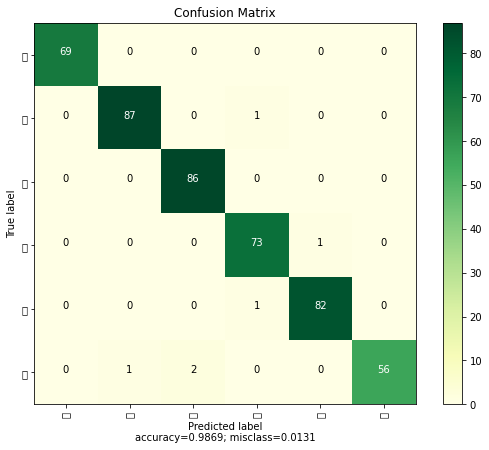

Classification Report
---------------------
              precision    recall  f1-score   support

           ለ     1.0000    1.0000    1.0000        69
           መ     0.9886    0.9886    0.9886        88
           በ     0.9773    1.0000    0.9885        86
           ተ     0.9733    0.9865    0.9799        74
           ነ     0.9880    0.9880    0.9880        83
           ወ     1.0000    0.9492    0.9739        59

    accuracy                         0.9869       459
   macro avg     0.9879    0.9854    0.9865       459
weighted avg     0.9871    0.9869    0.9869       459


Mistaken predictions
--------------------
Picture: መ/መ (48).jpg  Misprediction ==> ተ
Picture: ተ/ተ (69).jpg  Misprediction ==> ነ
Picture: ነ/ነ (42).jpg  Misprediction ==> ተ
Picture: ወ/ወ (10).jpg  Misprediction ==> በ
Picture: ወ/ወ (19).jpg  Misprediction ==> በ
Picture: ወ/ወ (6).jpg  Misprediction ==> መ


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=(50, 50),shuffle=False, batch_size=128,class_mode='categorical')

results_for('best_model.h5',test_generator,"Test")

<ipython-input-35-58d715248bcc>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(data_generator)


Validation  acc: 0.9934924244880676
Validation  loss: 0.06644852459430695


<ipython-input-35-58d715248bcc>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(data_generator, num_of_samples // batch_size)
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4616 (\N{ETHIOPIC SYLLABLE LA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4632 (\N{ETHIOPIC SYLLABLE MA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4704 (\N{ETHIOPIC SYLLABLE BA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4720 (\N{ETHIOPIC SYLLABLE TA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4752 (\N{ETHIOPIC SYLLABLE NA}) missing from current font.
  plt.tight_layout()
<ipython-input-34-c0e4107e4cd0>:75: UserWarning: Glyph 4808

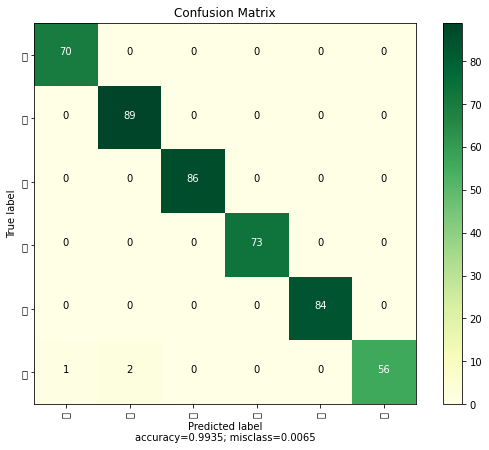

Classification Report
---------------------
              precision    recall  f1-score   support

           ለ     0.9859    1.0000    0.9929        70
           መ     0.9780    1.0000    0.9889        89
           በ     1.0000    1.0000    1.0000        86
           ተ     1.0000    1.0000    1.0000        73
           ነ     1.0000    1.0000    1.0000        84
           ወ     1.0000    0.9492    0.9739        59

    accuracy                         0.9935       461
   macro avg     0.9940    0.9915    0.9926       461
weighted avg     0.9936    0.9935    0.9934       461


Mistaken predictions
--------------------
Picture: ወ/ወ (24).jpg  Misprediction ==> ለ
Picture: ወ/ወ (49).jpg  Misprediction ==> መ
Picture: ወ/ወ (53).jpg  Misprediction ==> መ


In [ ]:
results_for('best_model.h5',validation_generator,"Validation")